In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [51]:
def binomial_tree_european_option(S0, K, r, sigma, T, n, option_type="call"):
  """Prices an option using the binomial tree method.

  Args:
    S0: Initial stock price.
    K: Strike price.
    r: Risk-free interest rate.
    sigma: Volatility.
    T: Time to maturity.
    steps: Number of steps in the tree.
    is_put: Whether to price a put option (True) or a call option (False).

  Returns:
    The price of the option.
  """

  dt = T / n
  u = np.exp(sigma * math.sqrt(dt))
  d = 1.0 / u
  pu = (np.exp(r * dt) - d) / (u - d)
  pd = 1.0 - pu

  # Construct the binomial tree.
  tree = np.zeros((n + 1, n + 1))
  if option_type=="call":
    #tree[steps, steps] = max(0, K - S0)
    for i in range(0, n + 1):
      tree[n, i] = max(S0 * (u ** (i)) * (d ** (n - i))-K , 0)
  else:
    #tree[steps, steps] = max(0, S0 - K)
    for i in range(0, n + 1):
      tree[n, i] = max(K-S0 * (u ** (i)) * (d ** (n - i)) , 0)
  """for i in range(steps, -1, -1):
    for j in range(i - 1, -1, -1):
      if is_put:
        tree[i - 1, j] = max(0, K - S0 * u**j * d**(i - j))
      else:
        tree[i - 1, j] = max(0, S0 * u**j * d**(i - j) - K)"""

  for j in range(n - 1, -1, -1):
        for i in range(0, j + 1):
            tree[j, i] = np.exp(-r * dt) * (pu * tree[j + 1, i + 1] + (1 - pu) * tree[j + 1, i])
  #print(tree)
  return tree[0, 0]


In [52]:
def binomial_tree_american_option(S0, K, r, sigma, T, n, option_type="call"):
    """dt = T/n
    discount = np.exp(-r * dt)

    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u - d)

    # Initialize option tree with zeros
    option_tree = np.zeros((n+1, n+1))

    # Set up last time slice, terminal nodes.
    if option_type == "call":
        option_tree[:, n] = np.maximum(0, S0 * u**np.arange(n+1) - K)
    elif option_type == "put":
        option_tree[:, n] = np.maximum(0, K - S0 * u**np.arange(n+1))
    print(option_tree)
    # Step backwards in binomial tree
    for j in range(n-1, -1, -1):
        for i in range(j+1):
            if option_type == "call":
                option_tree[i, j] = max((q * option_tree[j+1,i+1] + (1-q) * option_tree[j+1, i]) * discount, S*(u**i)*(d**(j-i)) - K)
            elif option_type == "put":
                option_tree[i, j] = max((q * option_tree[j+1, i+1] + (1-q) * option_tree[j+1, i]) * discount, K - S*(u**i)*(d**(j-i)))
    print(option_tree)
    return option_tree[0, 0]"""

    dt = T / n
    u = np.exp(sigma * math.sqrt(dt))
    d = 1.0 / u
    pu = (np.exp(r * dt) - d) / (u - d)
    pd = 1.0 - pu

    # Construct the binomial tree.
    tree = np.zeros((n + 1, n + 1))
    St = np.zeros((n+1,n+1))
    for i in range(0, n + 1):
      if option_type=="call":
        #tree[steps, steps] = max(0, K - S0)
        tree[n, i] = max(S0 * (u ** (i)) * (d ** (n - i))-K , 0)
      else:
        #tree[steps, steps] = max(0, S0 - K)
         tree[n, i] = max(K-S0 * (u ** (i)) * (d ** (n - i)) , 0)
    """for i in range(steps, -1, -1):
      for j in range(i - 1, -1, -1):
        if is_put:
          tree[i - 1, j] = max(0, K - S0 * u**j * d**(i - j))
        else:
          tree[i - 1, j] = max(0, S0 * u**j * d**(i - j) - K)"""

    for j in range(n - 1, -1, -1):
          for i in range(0, j + 1):
            payoff = S0*(u**i)*(d**(j-i)) - K if option_type == "call"  else K - S0*(u**i)*(d**(j-i))
            tree[j, i] = max(payoff,np.exp(-r * dt) * (pu * tree[j + 1, i + 1] + (1 - pu) * tree[j + 1, i]))
    #print(tree)
    return tree[0, 0]



In [53]:
def trinomial_tree_european_option(S0, K, r,  sigma, T, n, option_type="call"):
  dt = T/n
  u = np.exp(sigma * np.sqrt(2 * dt))
  d = 1 / u
  pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
            (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
  pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) /
              (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
  pm = 1 - pu - pd
  disc = np.exp(-r*dt)

  #S = np.zeros((N+1, 2*N+1))
  #tree = np.zeros((N+1, 2*N+1))
  St = np.zeros((n+1,2*n+1))
  option_price = np.zeros((n+1,2*n+1))

  for j in range(2*n+1):
    St[n,j] = S0*u**(n-j)
    if option_type == "call":
      option_price[n,j] = max(St[n,j]-K,0)
    elif option_type == "put":
      option_price[n,j] = max(K-St[n,j],0)
  """for j in range(2*N+1):
    St = S0*(edx**(N-j))
    if option_type=="call":
      tree[N,j] = max(0,St-K)
    elif option_type == "put":
      tree[N,j] = max(0,K-St)
"""
  for i in range(n-1,-1,-1):
    for j in range(n-i, n+i+1):
      option_price[i,j] = disc*(pu*option_price[i+1,j-1]+ pm*option_price[i+1,j]+pd*option_price[i+1,j+1])

  return option_price[0,n]

In [54]:
def trinomial_tree_american_option(S0, K, r, sigma, T, n,option_type="call"):
  dt = T / n
  u = np.exp(sigma * np.sqrt(2 * dt))
  d = 1 / u


  pu = (
        (np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt/ 2)))
        / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    ) ** 2
  pd = (
        (-np.exp(r * dt / 2) + np.exp(sigma * np.sqrt(dt / 2)))
        / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    ) ** 2
  pm = 1 - pu - pd
  St = np.zeros((n+1,2*n+1))
  option_price = np.zeros((n+1,2*n+1))

  for j in range(2*n+1):
    St[n,j] = S0*u**(n-j)
    if option_type == "call":
      option_price[n,j] = max(St[n,j]-K,0)
    elif option_type == "put":
      option_price[n,j] = max(K-St[n,j],0)

  for i in range(n-1,-1,-1):
    for j in range(n-i,n+i+1):
      payoff = St[n,j] - K if option_type == "call" else K-St[n,j]
      option_price[i,j] = max(payoff, np.exp(-r*dt)*(pu*option_price[i+1,j+1] + pm*option_price[i+1,j] + pd*option_price[i+1,j-1]))

  return option_price[0,n]

In [55]:

def PutCallParityError(S0, K, r, sigma, T, n,optionStyle,model):
  if model == "Binomial":
    call_price = binomial_tree_european_option(S0, K, r, sigma, T, n,option_type="call") if optionStyle == "European" else binomial_tree_american_option(S0, K, r, sigma, T, n,option_type="call")
    put_price = binomial_tree_european_option(S0, K, r, sigma, T, n,option_type="put") if optionStyle == "European" else binomial_tree_american_option(S0, K, r, sigma, T, n,option_type="put")
  elif model == "Trinomial":
    if optionStyle == "European":
      call_price = trinomial_tree_european_option(S0, K, r, sigma, T, n,option_type="call")
      put_price = trinomial_tree_european_option(S0, K, r, sigma, T, n,option_type="put")
      print(call_price,put_price)
      print(np.round(call_price +(K*np.exp(-1*r*T)),2) - np.round(put_price + S0,2))
    else:
      call_price = trinomial_tree_american_option(S0, K, r, sigma, T, n,option_type="call")
      put_price = trinomial_tree_american_option(S0, K, r, sigma, T, n,option_type="put")

  Error = np.round(call_price +(K*np.exp(-1*r*T)),2) - np.round(put_price + S0,2)
  return Error

In [56]:
### Question 5,6,7



S0 = 100.0
K = 100.0
r = 0.05
sigma = 0.2
T = 0.25


# Choose the number of steps in the binomial tree.
steps = 100

# Price the ATM European call and put options.
call_price = binomial_tree_european_option(S0=100, K=100, r=0.05, sigma=0.2, T=0.25, n=100)
put_price = binomial_tree_european_option(S0, K, r, sigma, T, steps, option_type="put")

# Calculate the delta of the ATM European call and put options.
call_delta = (binomial_tree_european_option(S0 + 1, K, r, sigma, T, steps) -
               binomial_tree_european_option(S0 - 1, K, r, sigma, T, steps)) / 2.0
put_delta = (binomial_tree_european_option(S0 + 1, K, r, sigma, T, steps, option_type="put") -
               binomial_tree_european_option(S0 - 1, K, r, sigma, T, steps, option_type="put")) / 2.0

# Calculate the vega of the ATM European call and put options.
call_vega = (binomial_tree_european_option(S0, K, r, sigma + 0.05, T, steps) -
               binomial_tree_european_option(S0, K, r, sigma - 0.05, T, steps)) / 0.1
put_vega = (binomial_tree_european_option(S0, K, r, sigma + 0.05, T, steps, option_type="put") -
               binomial_tree_european_option(S0, K, r, sigma - 0.05, T, steps, option_type="put")) / 0.1

# Print the results.
print('Call price:', call_price)
print('Put price:', put_price)
print('Call delta:', call_delta)
print('Put delta:', put_delta)
print('Call vega:', call_vega)
print('Put vega:', put_vega)
#print(np.round(call_price +(K*np.exp(-1*r*T)),2) - np.round(put_price + S0,2))

Call price: 4.605026109484905
Put price: 3.362806158874057
Call delta: 0.5692897231786089
Put delta: -0.43071027682138596
Call vega: 19.584270866118654
Put vega: 19.584270866118576


In [57]:
### Question 8,9,10

In [58]:
# Question 8


S0 = 100
K = 100
r = 0.05
sigma = 0.20
T = 0.25  # 3 months
n = 100  # Number of steps

# Question 8
price_call_american = binomial_tree_american_option(S0, K, r, sigma, T, n, option_type="call")
price_put_american = binomial_tree_american_option(S0, K, r,  sigma, T, n, option_type="put")
print(f"American Call option price: {price_call_american:.2f}")
print(f"American Put option price: {price_put_american:.2f}")





American Call option price: 4.61
American Put option price: 3.47


In [59]:
# Question 9, 10

def compute_delta(S, K, r, T, sigma, n, option_type="call", deltaS=1e-4):
    price1 = binomial_tree_american_option(S + deltaS, K, r,  sigma, T, n, option_type)
    price2 = binomial_tree_american_option(S - deltaS, K, r,  sigma, T, n, option_type)
    return (price1 - price2) / (2 * deltaS)

def compute_vega(S, K, r, T, sigma, n, option_type="call", deltaSigma=1e-4):
    price1 = binomial_tree_american_option(S, K, r,  sigma + deltaSigma,T, n, option_type)
    price2 = binomial_tree_american_option(S, K, r, sigma - deltaSigma,T, n, option_type)
    return (price1 - price2) / (2 * deltaSigma)

S0 = 100
K = 100
r = 0.05
sigma = 0.20
T = 0.25  # 3 months
n = 100  # Number of steps
# Question 9
delta_call_american = compute_delta(S0, K, r, T, sigma, n, option_type="call")
delta_put_american = compute_delta(S0, K, r, T, sigma, n, option_type="put")
print(f"American Call option Delta: {delta_call_american:.4f}")
print(f"American Put option Delta: {delta_put_american:.4f}")

# Question 10
vega_call_american = compute_vega(S0, K, r, T, sigma, n, option_type="call")
vega_put_american = compute_vega(S0, K, r, T, sigma, n, option_type="put")
print(f"American Call option Vega with 20% volatility: {vega_call_american:.4f}")
print(f"American Put option Vega with 20% volatility: {vega_put_american:.4f}")

# Sensitivity to increased volatility (from 20% to 25%)
price_call_american_25 = binomial_tree_american_option(S0, K, r,  0.25,T, n, option_type="call")
price_put_american_25 = binomial_tree_american_option(S0, K, r,  0.25,T, n, option_type="put")
print(f"American Call option price with 25% volatility: {price_call_american_25:.2f}")
print(f"American Put option price with 25% volatility: {price_put_american_25:.2f}")



American Call option Delta: 0.5693
American Put option Delta: -0.4651
American Call option Vega with 20% volatility: 19.5949
American Put option Vega with 20% volatility: 19.5277
American Call option price with 25% volatility: 5.59
American Put option price with 25% volatility: 4.45


In [60]:
### Question 11 , 12,13 and 14

[0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 0.98, 'European and American Put-Call Parity Error using Binomial Model Vs Risk-Free Interest Rate r')

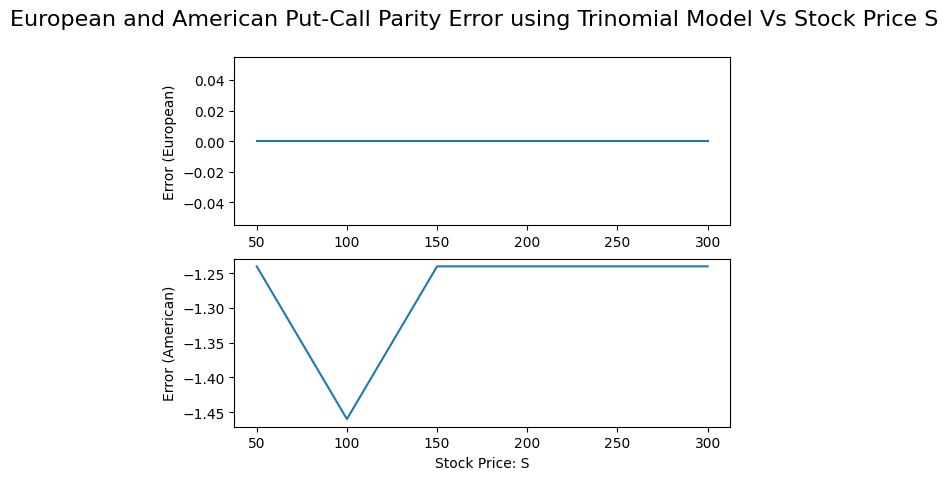

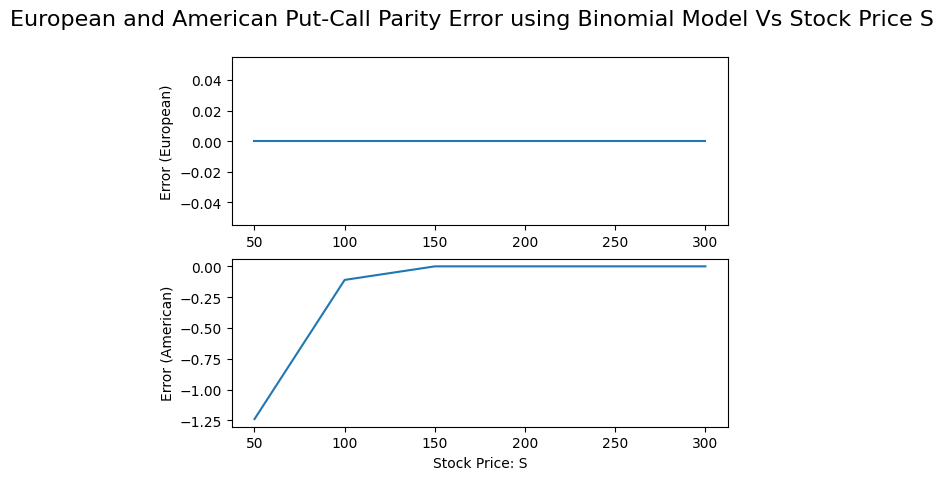

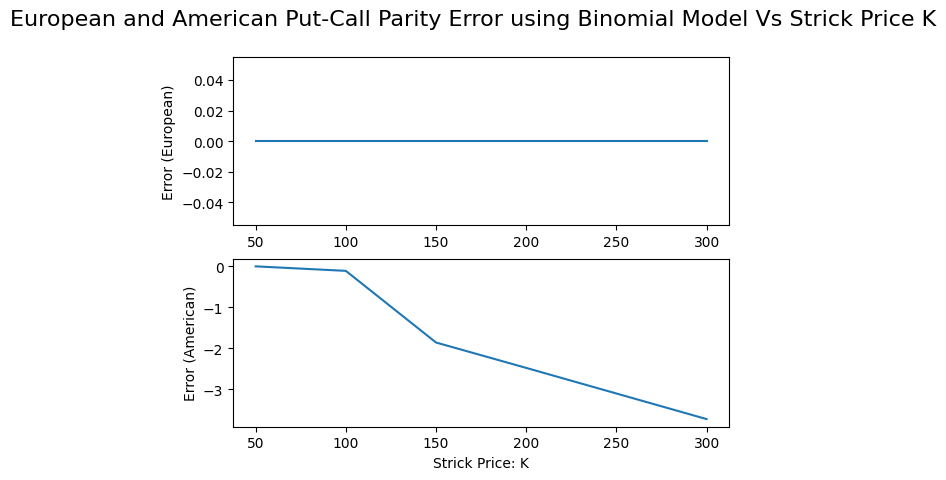

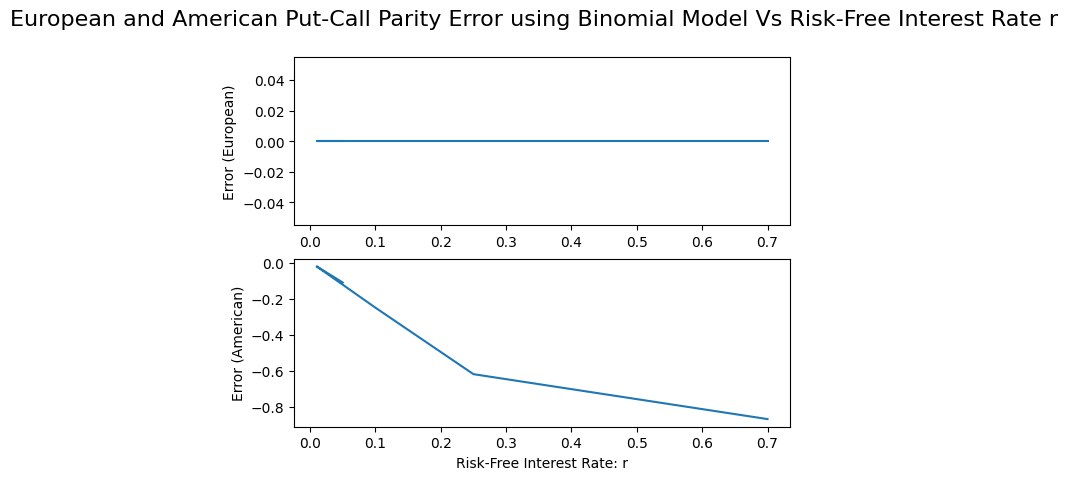

In [61]:
# Graph of Put-call parity error with respect to S0.
K = 100.0
r = 0.05
sigma = 0.2
T = 0.25
steps =100
S0 =100
S0_vector = [50.0,100.0,150,200,300]
#Error_vector_European = [PutCallParityErrorTrinomial(S,K,r,sigma,T,steps,optionStyle = "European",model = "Trinomial") for S in S0_vector]
Error_vector_European = []
for S in S0_vector:
  call_price=trinomial_tree_european_option(S, K, r,  sigma, T, steps, option_type="call")
  put_price=trinomial_tree_european_option(S, K, r,  sigma, T, steps, option_type="put")
  #print(call_price,put_price)
  Error = np.round(call_price +(K*np.exp(-1*r*T)),2) - np.round(put_price + S,2)
  #print(Error)
  Error_vector_European.append(Error)
Error_vector_American = [PutCallParityError(S0_vector[i],K,r,sigma,T,steps,optionStyle = "American",model = "Trinomial") for i in range(len(S0_vector))]
print(Error_vector_European)
fig, axs = plt.subplots(2)
axs[0].plot(S0_vector,Error_vector_European)
axs[1].plot(S0_vector,Error_vector_American)


axs[1].set_xlabel("Stock Price: S")
axs[0].set_ylabel("Error (European)")
axs[1].set_ylabel("Error (American)")
fig.suptitle("European and American Put-Call Parity Error using Trinomial Model Vs Stock Price S", fontsize=16)

Error_vector_European = [PutCallParityError(S0_vector[i],K,r,sigma,T,steps,optionStyle = "European",model = "Binomial") for i in range(len(S0_vector))]
Error_vector_American = [PutCallParityError(S0_vector[i],K,r,sigma,T,steps,optionStyle = "American",model = "Binomial") for i in range(len(S0_vector))]
#print(Error_vector_European)
fig, axs = plt.subplots(2)
axs[0].plot(S0_vector,Error_vector_European)
axs[1].plot(S0_vector,Error_vector_American)
# Graph of Put-call parity error with respect to K.

axs[1].set_xlabel("Stock Price: S")
axs[0].set_ylabel("Error (European)")
axs[1].set_ylabel("Error (American)")
fig.suptitle("European and American Put-Call Parity Error using Binomial Model Vs Stock Price S", fontsize=16)

K_vector = [50,100,150,200,300]
Error_vector_European = [PutCallParityError(S0,K_vector[i],r,sigma,T,steps,optionStyle = "European",model = "Binomial") for i in range(len(K_vector))]
Error_vector_American = [PutCallParityError(S0,K_vector[i],r,sigma,T,steps,optionStyle = "American",model = "Binomial") for i in range(len(K_vector))]

fig, axs = plt.subplots(2)
axs[0].plot(K_vector,Error_vector_European)
axs[1].plot(K_vector,Error_vector_American)

axs[1].set_xlabel("Strick Price: K")
axs[0].set_ylabel("Error (European)")
axs[1].set_ylabel("Error (American)")
fig.suptitle("European and American Put-Call Parity Error using Binomial Model Vs Strick Price K", fontsize=16)

# Graph of Put-call parity error with respect to r.

r_vector = [0.05,0.01,0.1,0.25,0.7]
Error_vector_European = [PutCallParityError(S0,K,r_vector[i],sigma,T,steps,optionStyle = "European",model = "Binomial") for i in range(len(r_vector))]
Error_vector_American = [PutCallParityError(S0,K,r_vector[i],sigma,T,steps,optionStyle = "American",model = "Binomial") for i in range(len(r_vector))]

fig, axs = plt.subplots(2)
axs[0].plot(r_vector,Error_vector_European)
axs[1].plot(r_vector,Error_vector_American)
axs[1].set_xlabel("Risk-Free Interest Rate: r")
axs[0].set_ylabel("Error (European)")
axs[1].set_ylabel("Error (American)")
fig.suptitle("European and American Put-Call Parity Error using Binomial Model Vs Risk-Free Interest Rate r", fontsize=16)

In [62]:
### Question 15,16

In [63]:




S0 = 100
r = 0.05
sigma = 0.20
T = 0.25  # 3 months
n = 100  # Number of steps
# For Call options
K_values_call = [0.90 * S0, 0.95 * S0, S0, 1.05 * S0, 1.10 * S0]

print("European Call option prices using trinomial tree:")
for K in K_values_call:
    price = trinomial_tree_european_option(S0, K, r,  sigma, T, n, option_type="call")
    #price1 = trinomial_tree_american_option(S0, K, r,  sigma, T, n, option_type="call")
    print(f"Strike {K}: {price:.2f}")
    #print(f"Strike {K}: {price1:.2f}")

# For Put options
K_values_put = [1.10 * S0, 1.05 * S0, S0, 0.95 * S0, 0.90 * S0]

print("\nEuropean Put option prices using trinomial tree:")
for K in K_values_put:
    price = trinomial_tree_european_option(S0, K, r,  sigma, T, n, option_type="put")
    #price1 = trinomial_tree_american_option(S0, K, r,  sigma, T, n, option_type="put")
    print(f"Strike {K}: {price:.2f}")
    #print(f"Strike {K}: {price1:.2f}")


#call_price = trinomial_tree_european_option(S0, K, r, T, sigma, n)
#put_price = trinomial_tree_european_option(S0, K, r, T, sigma, n,option_type="put")
#print(call_price)
#print(put_price)
#print(np.round(call_price +(K*np.exp(-1*r*T)),2) - np.round(put_price + S0,2))

European Call option prices using trinomial tree:
Strike 90.0: 11.67
Strike 95.0: 7.72
Strike 100: 4.61
Strike 105.0: 2.48
Strike 110.00000000000001: 1.19

European Put option prices using trinomial tree:
Strike 110.00000000000001: 9.83
Strike 105.0: 6.18
Strike 100: 3.37
Strike 95.0: 1.54
Strike 90.0: 0.55


In [64]:
### question 17, 18

In [65]:


# Define the parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time to maturity (in years)
n = 500  # Increased number of time steps in the trinomial tree

# Strike prices for Call and Put options
strike_prices = [90, 95, 100, 105, 110]

# Define a function to price options using the trinomial tree

# Calculate Call option prices
call_option_prices = [trinomial_tree_american_option(S0, K, r, sigma, T, n, option_type='call') for K in strike_prices]
print(call_option_prices)
# Calculate Put option prices
put_option_prices = [trinomial_tree_american_option(S0, K, r, sigma, T, n, option_type='put') for K in strike_prices]

# Print the results and trends
for i, K_strike in enumerate(strike_prices):
    print(f"Strike Price: {K_strike}")
    print(f"Call Option Price: {call_option_prices[i]:.2f}")
    print(f"Put Option Price: {put_option_prices[i]:.2f}")
    print("\n")

# Analyze trends in option prices
for i in range(len(strike_prices) - 1):
    if call_option_prices[i] > call_option_prices[i + 1]:
        call_trend = "decreasing"
    else:
        call_trend = "increasing"
    if put_option_prices[i] > put_option_prices[i + 1]:
        put_trend = "decreasing"
    else:
        put_trend = "increasing"

    print(f"Trend for Call Option Prices from {strike_prices[i]} to {strike_prices[i + 1]} is {call_trend}")
    print(f"Trend for Put Option Prices from {strike_prices[i]} to {strike_prices[i + 1]} is {put_trend}")


[10.499149336082384, 6.689032245529078, 3.8368114632077233, 1.968901640414554, 0.9010341113957032]
Strike Price: 90
Call Option Price: 10.50
Put Option Price: 0.74


Strike Price: 95
Call Option Price: 6.69
Put Option Price: 1.94


Strike Price: 100
Call Option Price: 3.84
Put Option Price: 4.06


Strike Price: 105
Call Option Price: 1.97
Put Option Price: 7.14


Strike Price: 110
Call Option Price: 0.90
Put Option Price: 11.02


Trend for Call Option Prices from 90 to 95 is decreasing
Trend for Put Option Prices from 90 to 95 is increasing
Trend for Call Option Prices from 95 to 100 is decreasing
Trend for Put Option Prices from 95 to 100 is increasing
Trend for Call Option Prices from 100 to 105 is decreasing
Trend for Put Option Prices from 100 to 105 is increasing
Trend for Call Option Prices from 105 to 110 is decreasing
Trend for Put Option Prices from 105 to 110 is increasing


Text(0.5, 0.98, 'European Call Price and Put Price using Binomial Model Vs Stock Price')

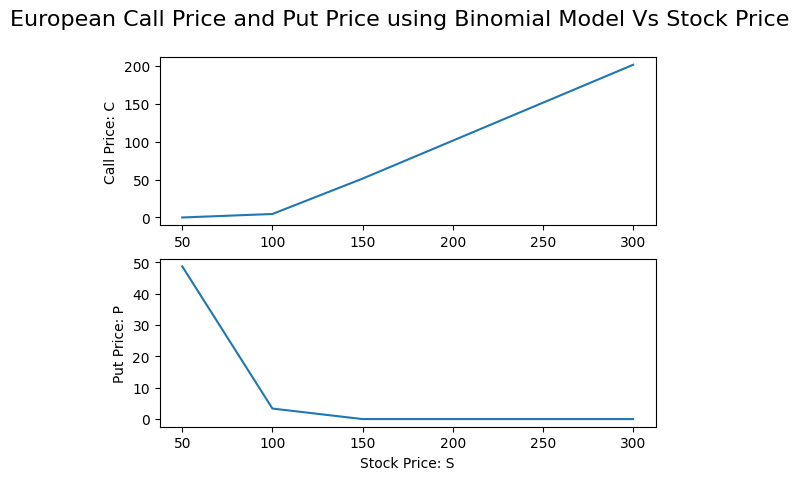

In [66]:
### Question 19.Graph #1. Graph European call prices and put prices versus stock prices.

StockPrice = [50,100,150,200,300]
CallPrice = []
PutPrice = []
for S0 in StockPrice:
  Call_price = binomial_tree_european_option(S0,K=100,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="call")
  CallPrice.append(Call_price)
  Put_price = binomial_tree_european_option(S0,K=100,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="put")
  PutPrice.append(Put_price)

fig, axs = plt.subplots(2)
axs[0].plot(StockPrice,CallPrice)
axs[1].set_xlabel("Stock Price: S")
axs[0].set_ylabel("Call Price: C")
axs[1].plot(StockPrice,PutPrice)
axs[1].set_ylabel("Put Price: P")
fig.suptitle("European Call Price and Put Price using Binomial Model Vs Stock Price", fontsize=16)

Text(0.5, 0.98, 'American Call Price and Put Price using Binomail Model Vs Stock Price')

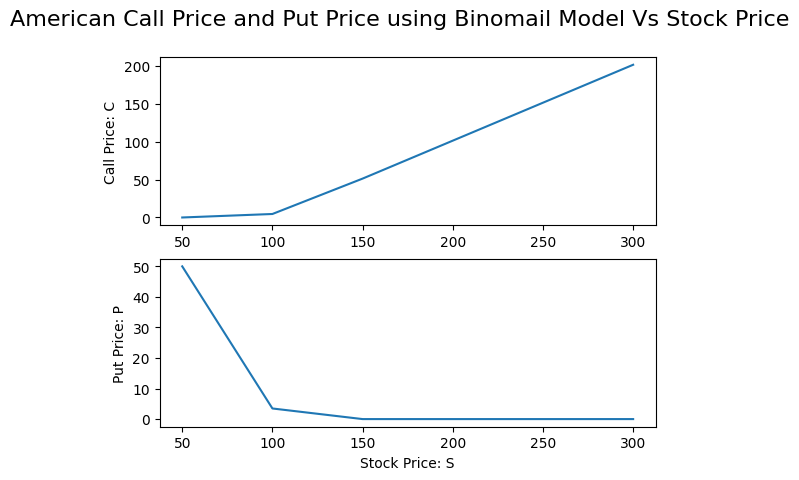

In [67]:
### Question 20.Graph #2. Graph American call prices and put prices versus stock prices.

StockPrice = [50,100,150,200,300]
CallPrice = []
PutPrice = []
for S0 in StockPrice:
  Call_price = binomial_tree_american_option(S0,K=100,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="call")
  CallPrice.append(Call_price)
  Put_price = binomial_tree_american_option(S0,K=100,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="put")
  PutPrice.append(Put_price)

fig, axs = plt.subplots(2)
axs[0].plot(StockPrice,CallPrice)
axs[1].set_xlabel("Stock Price: S")
axs[0].set_ylabel("Call Price: C")
axs[1].plot(StockPrice,PutPrice)
axs[1].set_ylabel("Put Price: P")
fig.suptitle("American Call Price and Put Price using Binomail Model Vs Stock Price", fontsize=16)

Text(0.5, 0.98, 'European and American Call Price using Binomial Model Vs Stock Price')

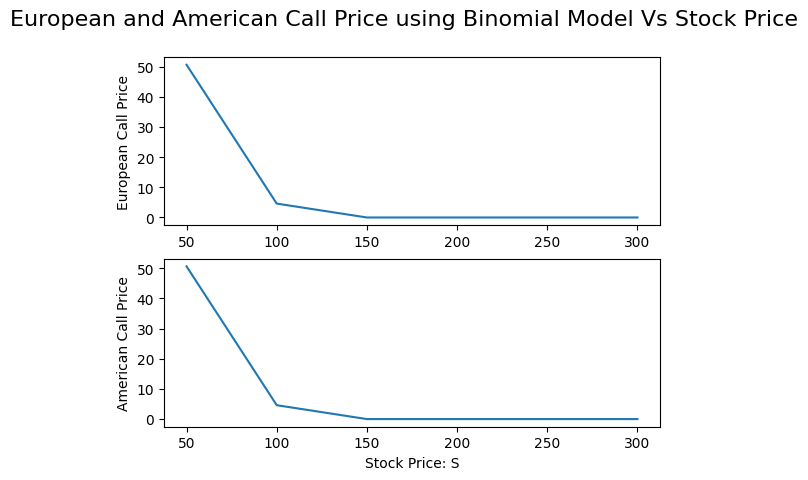

In [68]:
### 21.Graph #3. Graph European and American call prices versus strike.

StrickPrice = [50,100,150,200,300]
CallPriceE = []
CallPriceA = []
for K0 in StrickPrice:
  Call_priceE = binomial_tree_european_option(S0=100,K=K0,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="call")
  CallPriceE.append(Call_priceE)
  Call_priceA = binomial_tree_american_option(S0=100,K=K0,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="call")
  CallPriceA.append(Call_priceA)


fig, axs = plt.subplots(2)
axs[0].plot(StockPrice,CallPriceE)
axs[1].plot(StockPrice,CallPriceA)

axs[1].set_xlabel("Stock Price: S")
axs[0].set_ylabel("European Call Price")
axs[1].set_ylabel("American Call Price")
fig.suptitle("European and American Call Price using Binomial Model Vs Stock Price", fontsize=16)

Text(0.5, 0.98, 'European and American Put Price using Binomial Model Vs Stock Price')

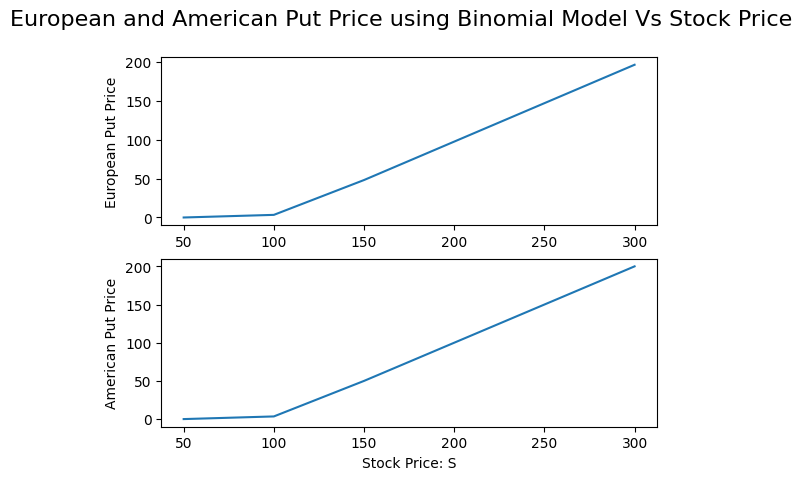

In [69]:
### 22.Graph #4. Graph European and American put prices versus strike.


StrickPrice = [50,100,150,200,300]

PutPriceE = []
PutPriceA = []
for K0 in StrickPrice:
  Put_priceE = binomial_tree_european_option(S0=100,K=K0,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="put")
  PutPriceE.append(Put_priceE)
  Put_priceA = binomial_tree_american_option(S0=100,K=K0,r =0.05,sigma=0.20,T=0.25,n =100, option_type ="put")
  PutPriceA.append(Put_priceA)

fig, axs = plt.subplots(2)
axs[0].plot(StockPrice,PutPriceE)
axs[1].plot(StockPrice,PutPriceA)

axs[1].set_xlabel("Stock Price: S")
axs[0].set_ylabel("European Put Price")
axs[1].set_ylabel("American Put Price")
fig.suptitle("European and American Put Price using Binomial Model Vs Stock Price", fontsize=16)

European Call option prices using trinomial tree:


Text(0.5, 0.98, 'European Call Price, Put Price using Trinomial Model and Put-Call Parity Error Vs Strick Price')

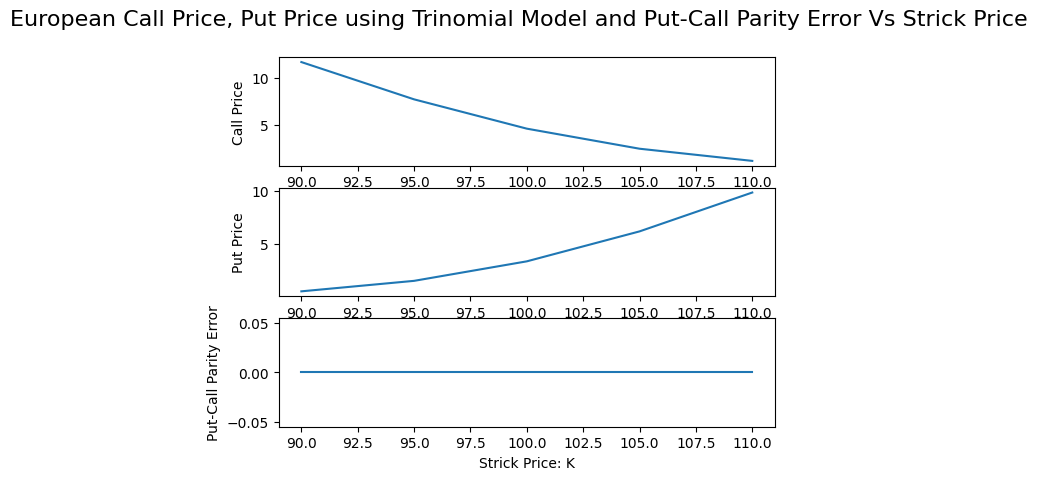

In [70]:
### 23.For the 5 strikes that your group member computed in Q15 and Q16, check
###    whether put-call parity holds (within sensible rounding). Briefly comment on the
###    reasons why/why not this is the case.

S0 = 100
r = 0.05
sigma = 0.20
T = 0.25  # 3 months
n = 100  # Number of steps
# For Call options
K_values = [0.90 * S0, 0.95 * S0, S0, 1.05 * S0, 1.10 * S0]
Call_price = []
Put_price = []
Error_PutCallParity=[]
print("European Call option prices using trinomial tree:")
for K in K_values:
    call_price = trinomial_tree_european_option(S0, K, r,  sigma, T, n, option_type="call")
    #price1 = trinomial_tree_american_option(S0, K, r,  sigma, T, n, option_type="call")
    #print(f"Strike {K}: {price:.2f}")
    #print(f"Strike {K}: {price1:.2f}")
    Call_price.append(call_price)
    put_price = trinomial_tree_european_option(S0, K, r,  sigma, T, n, option_type="put")
    Put_price.append(put_price)
    Error = np.round(call_price +(K*np.exp(-1*r*T)),2) - np.round(put_price + S0,2)
    Error_PutCallParity.append(Error)


fig, axs = plt.subplots(3)
axs[0].plot(K_values,Call_price)
axs[1].plot(K_values,Put_price)
axs[2].plot(K_values,Error_PutCallParity)

axs[2].set_xlabel("Strick Price: K")
axs[0].set_ylabel("Call Price")
axs[1].set_ylabel("Put Price")
axs[2].set_ylabel("Put-Call Parity Error")
fig.suptitle("European Call Price, Put Price using Trinomial Model and Put-Call Parity Error Vs Strick Price", fontsize=16)

Text(0.5, 0.98, 'American Call Price, Put Price using Trinomial Model and Put-Call Parity Error Vs Strick Price')

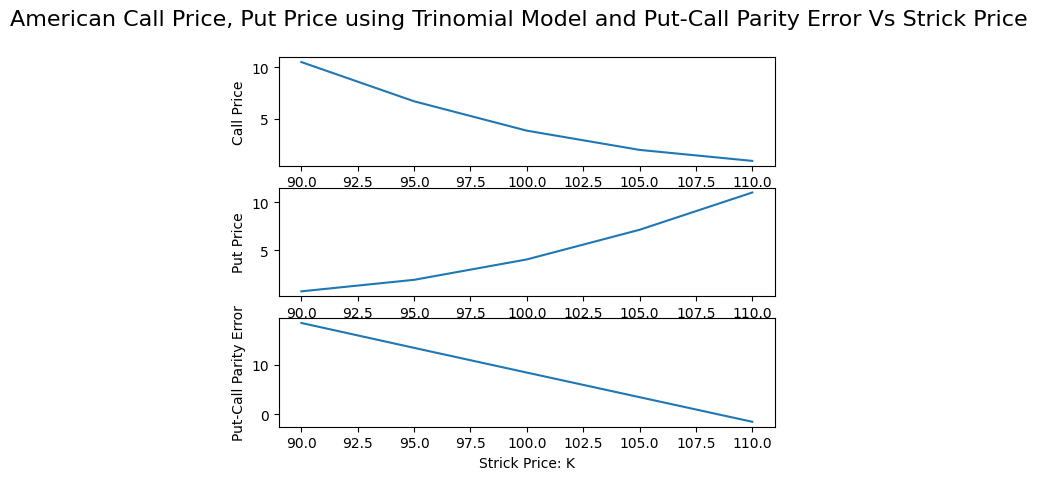

In [71]:
### Question 24.For the 5 strikes that your group member computed in Q17 and Q18, check
###             whether put-call parity holds (within sensible rounding). Briefly comment on the
###             reasons why/why not this is the case.

# Define the parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time to maturity (in years)
n = 500  # Increased number of time steps in the trinomial tree

# Strike prices for Call and Put options
strike_prices = [90, 95, 100, 105, 110]

# Define a function to price options using the trinomial tree
Error_PutCallParity = []
# Calculate Call option prices
call_option_prices = [trinomial_tree_american_option(S0, K, r, sigma, T, n, option_type='call') for K in strike_prices]
# Calculate Put option prices
put_option_prices = [trinomial_tree_american_option(S0, K, r, sigma, T, n, option_type='put') for K in strike_prices]

for i in range(len(strike_prices)):
    Error = np.round(call_option_prices[i] +(K*np.exp(-1*r*T)),2) - np.round(put_option_prices[i] + S0,2)
    Error_PutCallParity.append(Error)

# Print the results and trends
fig, axs = plt.subplots(3)
axs[0].plot(strike_prices,call_option_prices)
axs[1].plot(strike_prices,put_option_prices)
axs[2].plot(strike_prices,Error_PutCallParity)


axs[2].set_xlabel("Strick Price: K")
axs[0].set_ylabel("Call Price")
axs[1].set_ylabel("Put Price")
axs[2].set_ylabel("Put-Call Parity Error")
fig.suptitle("American Call Price, Put Price using Trinomial Model and Put-Call Parity Error Vs Strick Price", fontsize=16)

In [72]:
### Question 25

In [73]:
import numpy as np
import math

def binomial_tree(S0, K, r, sigma, T, steps):
  """Prices an option using the binomial tree method.

  Args:
    S0: Initial stock price.
    K: Strike price.
    r: Risk-free interest rate.
    sigma: Volatility.
    T: Time to maturity.
    steps: Number of steps in the tree.

  Returns:
    The price of the option.
  """

  dt = T / steps
  u = np.exp(sigma * math.sqrt(dt))
  d = 1.0 / u
  pu = (np.exp(r * dt) - d) / (u - d)
  pd = 1.0 - pu

  # Construct the binomial tree.
  tree = np.zeros((steps + 1, steps + 1))
  tree[steps, steps] = max(0, K - S0)
  for i in range(steps, 0, -1):
    for j in range(i - 1, -1, -1):
      tree[i - 1, j] = pu * tree[i, j + 1] + pd * tree[i, j]

  return tree[0, 0]

# Define the parameters of the option.
S0 = 180.0
K = 182.0
r = 0.02
sigma = 0.25
T = 0.5

# Price the put option using the binomial tree method.
put_price = binomial_tree(S0, K, r, sigma, T, steps=3)

# Print the put price.
print('Put price:', put_price)


Put price: 0.23650356304991335


In [74]:
### Question 26

In [75]:
import numpy as np

S0 = 180
K = 182
r = 0.02
sigma = 0.25
T = 6/12
n = 25
dt = T/n
discount = np.exp(-r*dt)

u = np.exp(sigma * np.sqrt(dt))
d = 1/u
q = (np.exp(r*dt) - d) / (u - d)

def american_put_price(S0, K, r, T, sigma, n):
    prices = np.zeros(n+1)
    values = np.zeros(n+1)

    for i in range(n+1):
        prices[i] = S0 * (u**i) * (d**(n-i))
        values[i] = max(K - prices[i], 0)

    for j in range(n-1, -1, -1):
        for i in range(j+1):
            values[i] = (q * values[i] + (1-q) * values[i+1]) * discount
            prices[i] = prices[i] * u
            values[i] = max(K - prices[i], values[i])

    return values[0]

price = american_put_price(S0, K, r, T, sigma, n)
print(f"American put option price: ${price:.2f}")


American put option price: $12.29


In [76]:
### Question 27

In [77]:
def trinomial_tree_asian_put_option(S, K, r, T, sigma, n):
    dt = T/n
    discount = np.exp(-r * dt)

    u = np.exp(sigma * np.sqrt(2*dt))
    d = 1/u
    m = 1

    pu = ((np.exp(r*dt/2) - np.exp(-sigma * np.sqrt(dt/2))) / (np.exp(sigma * np.sqrt(dt/2)) - np.exp(-sigma * np.sqrt(dt/2))) )**2
    pd = ((np.exp(sigma * np.sqrt(dt/2)) - np.exp(r*dt/2)) / (np.exp(sigma * np.sqrt(dt/2)) - np.exp(-sigma * np.sqrt(dt/2))) )**2
    pm = 1 - pu - pd

    option_tree = np.zeros((2*n + 1, n + 1))
    stock_price_tree = np.zeros((2*n + 1, n + 1))
    cumulative_price_tree = np.zeros((2*n + 1, n + 1))

    stock_price_tree[n, 0] = S
    cumulative_price_tree[n, 0] = S

    for j in range(1, n + 1):
        for i in range(2*j + 1):
            up = stock_price_tree[i, j-1] * u
            down = stock_price_tree[i, j-1] * d
            mid = stock_price_tree[i, j-1]

            stock_price_tree[i, j] = up if i <= n-j else (down if i >= n+j else mid)
            cumulative_price_tree[i, j] = cumulative_price_tree[i, j-1] + stock_price_tree[i, j]

            average_price = cumulative_price_tree[i, j] / (j+1)

            option_tree[i, j] = max(0, K - average_price)

    for j in range(n-1, -1, -1):
        for i in range(2*j + 1):
            option_tree[i, j] = discount * (pu * option_tree[i, j + 1] + pm * option_tree[i + 1, j + 1] + pd * option_tree[i + 2, j + 1])

    return option_tree[0, 0]

S0 = 180
r = 0.02
sigma = 0.25
T = 6/12
n = 25
K = S0  # ATM Put

asian_put_price = trinomial_tree_asian_put_option(S0, K, r, T, sigma, n)
print(f"Price of the Asian ATM Put option is: {asian_put_price:.2f}")


Price of the Asian ATM Put option is: 178.21
